## 2차 과제

- 주제: 데이터 크롤링을 활용한 뉴스 & 리뷰 데이터 분석
- 데이터: 자유롭게 크롤링
- 사용 라이브러리: selenium, beautifulsoup, etc.

### 1. 뉴스 기사 데이터 크롤링

1.1 원하는 뉴스 기사의 본문을 크롤링하시오.

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
 !pip install selenium
 !pip install bs4 requests
 !pip install newspaper3k

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy
import re

In [ ]:
url = 'https://www.mbn.co.kr/news/society/5011874'
news_content = requests.get(url).content
source = BeautifulSoup(news_content, 'html.parser')

In [ ]:
source.find('title').get_text() # 기사 제목

"전국 의대생 사흘간 777명 '유효 휴학' 신청…누적 7,594건"

In [ ]:
div=source.find("div", class_="detail")
article=div.get_text()
print(article)





↑ 서울 시내 한 의과대학 열람실에 해부학 교재가 놓여 있다. / 사진=연합뉴스 자료사진. 재판매 및 DB 금지
정부의 의대 증원 정책에 반발해 '유효' 휴학계를 제출한 의대생이 8천 명에 달했습니다.

오늘(18일) 교육부에 따르면 15∼17일 전국 40개 의대를 대상으로 조사한 결과 '유효 휴학 신청' 건수는 777명입니다.

기존에 낸 휴학계를 철회한 학생은 2개교에서 6명이 발생했습니다.

이로써 유효 휴학 신청 건수는 누적 7천594건이 됐습니다. 지난해 4월 기준 전국 의대 재학생(1만 8천793명)의 40.4% 수준입니다.

유효 휴학 신청은 학부모 동의, 학과장 서명 등 학칙에 따른 절차를 지켜 제출된 휴학계입니다.

교육부는 지난달까지 단순히 휴학계 제출을 모두 집계했습니다. 이렇게 휴학계를 제출한 의대생은 총 1만 3천697명(중복 포함)에 달했습니다.

하지만 이달부터는 유효 휴학 신청만을 집계하고 있습니다.

절차를 지키지 않은 휴학의 경우 이를 반려해 달라고 각 대학에 요청했으므로 의미가 없다고 봤기 때문입니다.

유효 휴학 신청은 이달 내내 하루 기준 한두 자릿수로 증가하다가 12일 511명을 시작으로 전날까지 큰 증가세를 이어갔습니다. 6일 사이 2천157명이 유효 휴학계를 제출했습니다.

의대생 유효 휴학 신청이 갑자기 증가한 것은 의대생들이 '동맹휴학'을 관철하겠다고 결의한 결과로 보입니다.

대한의과대학 의학전문대학원 학생협회(의대협)는 지난 9일 임시총회에서 '가장 먼저 휴학계가 수리되는 학교의 날짜에 맞춰 40개 모든 단위가 학교 측에 휴학계 수리를 요청한다'는 안건을 만장일치로 의결했습니다.

교육부는 형식 요건을 갖췄더라도 "동맹휴학은 휴학 사유가 아니어서 허가해서는 안 된다"는 입장입니다.

동맹휴학으로 승인된 휴학은 아직 한 건도 없었다는 게 교육부 설명입니다.
↑ 지난 5일 오후 서울의 한 대학교 의과대학이 한산한 모습을 보이고 있다. / 사진=연합뉴스 자료사진. 재판매 및 DB 금지
수업 거부가 확인된 곳은

In [ ]:
article

'\n\n\n\n↑ 서울 시내 한 의과대학 열람실에 해부학 교재가 놓여 있다. / 사진=연합뉴스 자료사진. 재판매 및 DB 금지\r\n정부의 의대 증원 정책에 반발해 \'유효\' 휴학계를 제출한 의대생이 8천 명에 달했습니다.\n\r\n오늘(18일) 교육부에 따르면 15∼17일 전국 40개 의대를 대상으로 조사한 결과 \'유효 휴학 신청\' 건수는 777명입니다.\n\r\n기존에 낸 휴학계를 철회한 학생은 2개교에서 6명이 발생했습니다.\n\r\n이로써 유효 휴학 신청 건수는 누적 7천594건이 됐습니다. 지난해 4월 기준 전국 의대 재학생(1만 8천793명)의 40.4% 수준입니다.\n\r\n유효 휴학 신청은 학부모 동의, 학과장 서명 등 학칙에 따른 절차를 지켜 제출된 휴학계입니다.\n\r\n교육부는 지난달까지 단순히 휴학계 제출을 모두 집계했습니다. 이렇게 휴학계를 제출한 의대생은 총 1만 3천697명(중복 포함)에 달했습니다.\n\r\n하지만 이달부터는 유효 휴학 신청만을 집계하고 있습니다.\n\r\n절차를 지키지 않은 휴학의 경우 이를 반려해 달라고 각 대학에 요청했으므로 의미가 없다고 봤기 때문입니다.\n\r\n유효 휴학 신청은 이달 내내 하루 기준 한두 자릿수로 증가하다가 12일 511명을 시작으로 전날까지 큰 증가세를 이어갔습니다. 6일 사이 2천157명이 유효 휴학계를 제출했습니다.\n\r\n의대생 유효 휴학 신청이 갑자기 증가한 것은 의대생들이 \'동맹휴학\'을 관철하겠다고 결의한 결과로 보입니다.\n\r\n대한의과대학 의학전문대학원 학생협회(의대협)는 지난 9일 임시총회에서 \'가장 먼저 휴학계가 수리되는 학교의 날짜에 맞춰 40개 모든 단위가 학교 측에 휴학계 수리를 요청한다\'는 안건을 만장일치로 의결했습니다.\n\r\n교육부는 형식 요건을 갖췄더라도 "동맹휴학은 휴학 사유가 아니어서 허가해서는 안 된다"는 입장입니다.\n\r\n동맹휴학으로 승인된 휴학은 아직 한 건도 없었다는 게 교육부 설명입니다.\n↑ 지난 5일 오후 서울의 한 대학

### 무의미한 부분 삭제

In [ ]:
news_content = article.replace('/ 사진=연합뉴스 자료사진. 재판매 및 DB 금지', '')
news_content = news_content.replace('[박연수 디지털뉴스부 인턴기자 younsu456@naver.com]', '')
news_content = news_content.replace('\n\r\n', ' ')
news_content = news_content.replace('\n\n\n\n', ' ')
news_content = news_content.replace('\n', ' ')
news_content = news_content.replace('\t\t\t\t\t', '')
news_content = news_content.replace('\r', ' ')

In [ ]:
news_content

' ↑ 서울 시내 한 의과대학 열람실에 해부학 교재가 놓여 있다.   정부의 의대 증원 정책에 반발해 \'유효\' 휴학계를 제출한 의대생이 8천 명에 달했습니다. 오늘(18일) 교육부에 따르면 15∼17일 전국 40개 의대를 대상으로 조사한 결과 \'유효 휴학 신청\' 건수는 777명입니다. 기존에 낸 휴학계를 철회한 학생은 2개교에서 6명이 발생했습니다. 이로써 유효 휴학 신청 건수는 누적 7천594건이 됐습니다. 지난해 4월 기준 전국 의대 재학생(1만 8천793명)의 40.4% 수준입니다. 유효 휴학 신청은 학부모 동의, 학과장 서명 등 학칙에 따른 절차를 지켜 제출된 휴학계입니다. 교육부는 지난달까지 단순히 휴학계 제출을 모두 집계했습니다. 이렇게 휴학계를 제출한 의대생은 총 1만 3천697명(중복 포함)에 달했습니다. 하지만 이달부터는 유효 휴학 신청만을 집계하고 있습니다. 절차를 지키지 않은 휴학의 경우 이를 반려해 달라고 각 대학에 요청했으므로 의미가 없다고 봤기 때문입니다. 유효 휴학 신청은 이달 내내 하루 기준 한두 자릿수로 증가하다가 12일 511명을 시작으로 전날까지 큰 증가세를 이어갔습니다. 6일 사이 2천157명이 유효 휴학계를 제출했습니다. 의대생 유효 휴학 신청이 갑자기 증가한 것은 의대생들이 \'동맹휴학\'을 관철하겠다고 결의한 결과로 보입니다. 대한의과대학 의학전문대학원 학생협회(의대협)는 지난 9일 임시총회에서 \'가장 먼저 휴학계가 수리되는 학교의 날짜에 맞춰 40개 모든 단위가 학교 측에 휴학계 수리를 요청한다\'는 안건을 만장일치로 의결했습니다. 교육부는 형식 요건을 갖췄더라도 "동맹휴학은 휴학 사유가 아니어서 허가해서는 안 된다"는 입장입니다. 동맹휴학으로 승인된 휴학은 아직 한 건도 없었다는 게 교육부 설명입니다. ↑ 지난 5일 오후 서울의 한 대학교 의과대학이 한산한 모습을 보이고 있다.   수업 거부가 확인된 곳은 6개 대학입니다. 해당 학교에서는 학생 면담·설명 등 정상적인 학사 운영을 위해 노력 중이라고 교육부는

### \ 삭제

In [ ]:
pattern = re.compile(r'\'')
news_content = pattern.sub('', news_content)

In [ ]:
news_content

' ↑ 서울 시내 한 의과대학 열람실에 해부학 교재가 놓여 있다.   정부의 의대 증원 정책에 반발해 유효 휴학계를 제출한 의대생이 8천 명에 달했습니다. 오늘(18일) 교육부에 따르면 15∼17일 전국 40개 의대를 대상으로 조사한 결과 유효 휴학 신청 건수는 777명입니다. 기존에 낸 휴학계를 철회한 학생은 2개교에서 6명이 발생했습니다. 이로써 유효 휴학 신청 건수는 누적 7천594건이 됐습니다. 지난해 4월 기준 전국 의대 재학생(1만 8천793명)의 40.4% 수준입니다. 유효 휴학 신청은 학부모 동의, 학과장 서명 등 학칙에 따른 절차를 지켜 제출된 휴학계입니다. 교육부는 지난달까지 단순히 휴학계 제출을 모두 집계했습니다. 이렇게 휴학계를 제출한 의대생은 총 1만 3천697명(중복 포함)에 달했습니다. 하지만 이달부터는 유효 휴학 신청만을 집계하고 있습니다. 절차를 지키지 않은 휴학의 경우 이를 반려해 달라고 각 대학에 요청했으므로 의미가 없다고 봤기 때문입니다. 유효 휴학 신청은 이달 내내 하루 기준 한두 자릿수로 증가하다가 12일 511명을 시작으로 전날까지 큰 증가세를 이어갔습니다. 6일 사이 2천157명이 유효 휴학계를 제출했습니다. 의대생 유효 휴학 신청이 갑자기 증가한 것은 의대생들이 동맹휴학을 관철하겠다고 결의한 결과로 보입니다. 대한의과대학 의학전문대학원 학생협회(의대협)는 지난 9일 임시총회에서 가장 먼저 휴학계가 수리되는 학교의 날짜에 맞춰 40개 모든 단위가 학교 측에 휴학계 수리를 요청한다는 안건을 만장일치로 의결했습니다. 교육부는 형식 요건을 갖췄더라도 "동맹휴학은 휴학 사유가 아니어서 허가해서는 안 된다"는 입장입니다. 동맹휴학으로 승인된 휴학은 아직 한 건도 없었다는 게 교육부 설명입니다. ↑ 지난 5일 오후 서울의 한 대학교 의과대학이 한산한 모습을 보이고 있다.   수업 거부가 확인된 곳은 6개 대학입니다. 해당 학교에서는 학생 면담·설명 등 정상적인 학사 운영을 위해 노력 중이라고 교육부는 전했습니다. 수업 거부가 이

### ↑ 지우기

In [ ]:
news_content = news_content.replace('↑', '')

In [ ]:
news_content

'  서울 시내 한 의과대학 열람실에 해부학 교재가 놓여 있다.   정부의 의대 증원 정책에 반발해 유효 휴학계를 제출한 의대생이 8천 명에 달했습니다. 오늘(18일) 교육부에 따르면 15∼17일 전국 40개 의대를 대상으로 조사한 결과 유효 휴학 신청 건수는 777명입니다. 기존에 낸 휴학계를 철회한 학생은 2개교에서 6명이 발생했습니다. 이로써 유효 휴학 신청 건수는 누적 7천594건이 됐습니다. 지난해 4월 기준 전국 의대 재학생(1만 8천793명)의 40.4% 수준입니다. 유효 휴학 신청은 학부모 동의, 학과장 서명 등 학칙에 따른 절차를 지켜 제출된 휴학계입니다. 교육부는 지난달까지 단순히 휴학계 제출을 모두 집계했습니다. 이렇게 휴학계를 제출한 의대생은 총 1만 3천697명(중복 포함)에 달했습니다. 하지만 이달부터는 유효 휴학 신청만을 집계하고 있습니다. 절차를 지키지 않은 휴학의 경우 이를 반려해 달라고 각 대학에 요청했으므로 의미가 없다고 봤기 때문입니다. 유효 휴학 신청은 이달 내내 하루 기준 한두 자릿수로 증가하다가 12일 511명을 시작으로 전날까지 큰 증가세를 이어갔습니다. 6일 사이 2천157명이 유효 휴학계를 제출했습니다. 의대생 유효 휴학 신청이 갑자기 증가한 것은 의대생들이 동맹휴학을 관철하겠다고 결의한 결과로 보입니다. 대한의과대학 의학전문대학원 학생협회(의대협)는 지난 9일 임시총회에서 가장 먼저 휴학계가 수리되는 학교의 날짜에 맞춰 40개 모든 단위가 학교 측에 휴학계 수리를 요청한다는 안건을 만장일치로 의결했습니다. 교육부는 형식 요건을 갖췄더라도 "동맹휴학은 휴학 사유가 아니어서 허가해서는 안 된다"는 입장입니다. 동맹휴학으로 승인된 휴학은 아직 한 건도 없었다는 게 교육부 설명입니다.  지난 5일 오후 서울의 한 대학교 의과대학이 한산한 모습을 보이고 있다.   수업 거부가 확인된 곳은 6개 대학입니다. 해당 학교에서는 학생 면담·설명 등 정상적인 학사 운영을 위해 노력 중이라고 교육부는 전했습니다. 수업 거부가 이어질

1.2 크롤링한 본문을 단어 단위로 나누고 각 단어가 나온 횟수와 함께 dataframe 형식으로 변환하시오.

Konlpy 패키지 다운받기

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2024-03-19 07:29:17--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2024-03-19 07:29:18--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc607fe40b0e855b6a56b4ec3c71.dl.dropboxusercontent.com/cd/0/get/CPXn77ou8fWgMGnWJ0uhJ5Ufrx7eeGJbsuGoSpz04mquTAffzRqFXyFSVLVjCTi_htAE0grn5N24RDaYMEN6Ftvc5d_Jgsf2eaKizqRARVoK1dIwbF3Am23y1-QhpZ_OividOMOo5sL0TQ64jObKlUsX/file?dl=1# [following]
--2024-03-19 07:29:18--  https://uc607fe40b0e855b6a56b4ec3c71.dl.dropboxusercontent.com/cd/0/get/CPXn77ou8fWgMGnWJ0uhJ5Ufrx7eeGJbsuGoSpz04mquTAffzRqFXyF

In [37]:
import konlpy
from konlpy.tag import Kkma, Komoran, Okt, Hannanum

In [ ]:
okt = Okt()

test1 = okt.morphs(news_content)
print(test1)

['서울', '시내', '한', '의과대학', '열람', '실', '에', '해부학', '교재', '가', '놓여', '있다', '.', '정부', '의', '의대', '증원', '정책', '에', '반발', '해', '유효', '휴학', '계', '를', '제출', '한', '의대', '생', '이', '8천', '명', '에', '달', '했습니다', '.', '오늘', '(', '18일', ')', '교육부', '에', '따르면', '15', '∼', '17일', '전국', '40', '개', '의대', '를', '대상', '으로', '조사', '한', '결과', '유효', '휴학', '신청', '건수', '는', '777', '명', '입니다', '.', '기존', '에', '낸', '휴학', '계', '를', '철회', '한', '학생', '은', '2', '개교', '에서', '6', '명', '이', '발생', '했습니다', '.', '이로써', '유효', '휴학', '신청', '건수', '는', '누적', '7천', '594', '건', '이', '됐습니다', '.', '지난해', '4월', '기준', '전국', '의대', '재학생', '(', '1만', '8천', '793', '명', ')', '의', '40.4%', '수준', '입니다', '.', '유효', '휴학', '신청', '은', '학부모', '동의', ',', '학과', '장', '서명', '등', '학칙', '에', '따른', '절차', '를', '지켜', '제출', '된', '휴학', '계', '입니다', '.', '교육부', '는', '지난달', '까지', '단순히', '휴학', '계', '제출', '을', '모두', '집계', '했습니다', '.', '이렇게', '휴학', '계', '를', '제출', '한', '의대', '생', '은', '총', '1만', '3천', '697', '명', '(', '중복', '포함', ')', '에', '달', '했습니다', '.', '하지만

In [ ]:
hannanum = Hannanum()

test2 = hannanum.morphs(news_content)
print(test2)

['서울', '시내', '하', 'ㄴ', '의과대학', '열람실', '에', '해부학', '교재', '가', '놓이', '어', '있', '다', '.', '정부', '의', '의대', '증원', '정책', '에', '반발', '하', '어', '유효', '휴학계', '를', '제출', '하', 'ㄴ', '의대생', '이', '8천', '명', '에', '달하', '었습니다', '.', '오늘(18일)', '교육부', '에', '따르', '면', '15∼17', '이', 'ㄹ', '전국', '40개', '의대', '를', '대상', '으로', '조사한', '결과', '유효', '휴학', '신청', '것', '이', 'ㄴ', '수', '는', '777명', '이', 'ㅂ니다', '.', '기존', '에', '내', 'ㄴ', '휴학계', '를', '철회', '하', 'ㄴ', '학생', '은', '2개교', '에서', '6명', '이', '발생', '하', '었습니다', '.', '이로써', '유효', '휴학', '신청', '것', '이', 'ㄴ', '수', '는', '누적', '7천594건', '이', '되', '었습니다', '.', '지난해', '4월', '기준', '전국', '의대', '재학생(1만', '8천793명', ')', '의', '40.4', '%', '수준', '이', 'ㅂ니다', '.', '유효', '휴학', '신청', '은', '학부모', '동', '의', ',', '학과장', '서명', '등', '학칙', '에', '따르', 'ㄴ', '절차', '를', '지키', '어', '제출', '되', 'ㄴ', '휴학계', '이', 'ㅂ니다', '.', '교육부', '는', '지난달', '까지', '단순히', '휴학계', '제출', '을', '모두', '집계', '하', '었습니다', '.', '이렇', '게', '휴학계', '를', '제출', '하', 'ㄴ', '의대생', '은', '총', '1', '만', '3천697명(중복', '포함', ')', '

In [ ]:
kkma = Kkma()

test3 = kkma.morphs(news_content)
print(test3)

['서울', '시내', '한', '의과', '대학', '열람실', '에', '해부학', '교재', '가', '놓이', '어', '있', '다', '.', '정부', '의', '의대', '증원', '정책', '에', '반발', '하', '어', '유효', '휴학계', '를', '제출', '하', 'ㄴ', '의대생', '이', '8', '천', '명', '에', '달하', '었', '습니다', '.', '오늘', '(', '18', '일', ')', '교육부', '에', '따르', '면', '15', '∼', '17', '일', '전국', '40', '개', '의대', '를', '대상', '으로', '조사', '하', 'ㄴ', '결과', '유효', '휴학', '신청', '건수', '는', '777', '명', '이', 'ㅂ니다', '.', '기존', '에', '내', 'ㄴ', '휴학계', '를', '철회', '하', 'ㄴ', '학생', '은', '2', '개', '교', '에서', '6', '명', '이', '발생', '하', '었', '습니다', '.', '이로써', '유효', '휴학', '신청', '건수', '는', '누적', '7', '천', '594', '건', '이', '되', '었', '습니다', '.', '지난해', '4', '월', '기준', '전국', '의대', '재학생', '(', '1', '만', '8', '천', '793', '명', ')', '의', '40.4', '%', '수준', '이', 'ㅂ니다', '.', '유효', '휴학', '신청', '은', '학부모', '동의', ',', '학', '과장', '서명', '등', '학칙', '에', '따르', 'ㄴ', '절차', '를', '지키', '어', '제출', '되', 'ㄴ', '휴학계', '이', 'ㅂ니다', '.', '교육부', '는', '지난달', '까지', '단순히', '휴학계', '제출', '을', '모두', '집계', '하', '었', '습니다', '.', '이렇게', '휴학계'

In [ ]:
word_df1 = pd.DataFrame(test1, columns=['words'])
word_df1 = pd.DataFrame(word_df1.groupby('words')['words'].count())
word_df1.rename(columns={'words':'cnt'}, inplace=True)
word_df1.reset_index(inplace=True)
word_df1.sort_values(by='cnt', ascending=False)[:10]

,words,cnt
4,.,26
328,휴학,20
217,이,17
189,에,14
209,을,14
208,은,14
0,"""",14
213,의대,13
307,한,13
117,를,11


In [ ]:
word_df2 = pd.DataFrame(test2, columns=['words'])
word_df2 = pd.DataFrame(word_df2.groupby('words')['words'].count())
word_df2.rename(columns={'words':'cnt'}, inplace=True)
word_df2.reset_index(inplace=True)
word_df2.sort_values(by='cnt', ascending=False)[:10]

,words,cnt
222,이,36
279,하,30
4,.,26
31,ㄴ,24
212,을,17
176,어,17
211,은,16
80,는,15
190,에,14
112,를,12


In [ ]:
word_df3 = pd.DataFrame(test3, columns=['words'])
word_df3 = pd.DataFrame(word_df3.groupby('words')['words'].count())
word_df3.rename(columns={'words':'cnt'}, inplace=True)
word_df3.reset_index(inplace=True)
word_df3.sort_values(by='cnt', ascending=False)[:10]

,words,cnt
292,하,33
226,이,27
5,.,26
32,ㄴ,25
87,는,20
217,을,18
194,었,18
195,에,16
216,은,16
173,습니다,15


1.3 불용어를 제거하시오.

In [ ]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','따른','및','는데','가','등','들','등','.	','ㄴ','었','습니다','어','"','가','를','고','ㅂ니다','의',',	','되','들','명','일','해','.',',','·','∼','했습니다','입니다','으로','(',')']

In [ ]:
result = []
for word in word_df1['words']:
    if word not in stopwords:
        result.append(word)

In [ ]:
result

['1',
 '12일',
 '15',
 '157',
 '17일',
 '18일',
 '1년',
 '1만',
 '2',
 '25',
 '2월',
 '2천',
 '30',
 '3분',
 '3천',
 '40',
 '40.4%',
 '4분',
 '4월',
 '511',
 '594',
 '5일',
 '6',
 '697',
 '6일',
 '777',
 '793',
 '7천',
 '8천',
 '9일',
 'F',
 '가장',
 '각',
 '갑자기',
 '갔습니다',
 '갖췄더라도',
 '같은',
 '개',
 '개강',
 '개교',
 '거나',
 '거부',
 '건',
 '건수',
 '것',
 '게',
 '결과',
 '결석',
 '결의',
 '경우',
 '계',
 '계획',
 '고등',
 '곳',
 '과목',
 '관계자',
 '관련',
 '관철',
 '교수',
 '교육법',
 '교육부',
 '교재',
 '구체',
 '기존',
 '기준',
 '까지',
 '날짜',
 '내내',
 '내용',
 '낸',
 '노력',
 '놓여',
 '누적',
 '다른',
 '다만',
 '단순히',
 '단위',
 '달',
 '달라',
 '대',
 '대부분',
 '대상',
 '대학',
 '대학가',
 '대학교',
 '대학원',
 '더',
 '덧붙였습니다',
 '도',
 '동맹',
 '동의',
 '됐습니다',
 '되는',
 '된',
 '된다',
 '됩니다',
 '따르면',
 '때',
 '또는',
 '라고',
 '라며',
 '로',
 '로부터',
 '마지노선',
 '만을',
 '만장일치',
 '말로',
 '맞춰',
 '먼저',
 '며',
 '면담',
 '모두',
 '모든',
 '모습',
 '물음',
 '미달',
 '반려',
 '반발',
 '받았다는',
 '받으면',
 '발생',
 '방지',
 '병원',
 '보강',
 '보도',
 '보이',
 '보인다',
 '보입니다',
 '본과',
 '봤기',
 '봤을',
 '부터',
 '부터는',
 '사례',
 '사유',
 '사이',
 '사직',
 '사직서',
 '상',
 

1.4 처리한 데이터를 워드아트로 변환해 어떤 단어가 가장 많이 나왔는지 확인하시오(폰트, 색 등 자유).

In [ ]:
word_df1 = word_df1[word_df1['words'].isin(result)]
word_df1

,words,cnt
5,1,2
6,12일,1
7,15,1
8,157,1
9,17일,1
...,...,...
324,형식,1
325,확보,1
326,확인,1
327,휴강,1


In [ ]:
word_df1.sort_values(by='cnt', ascending=False)[:10]

,words,cnt
328,휴학,20
213,의대,13
58,계,8
164,수업,8
206,유효,8
156,생,6
260,제출,6
170,신청,6
69,교육부,6
87,달,5


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
dic_word = word_df1.set_index('words').to_dict()['cnt']

In [ ]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


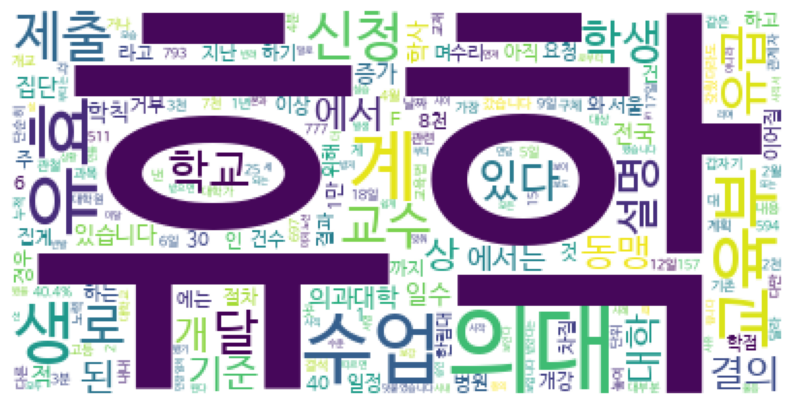

In [ ]:
font='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

word_cloud = WordCloud(font_path = font,background_color='white',max_font_size=400).generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(word_cloud) # 결과 보여주기

### 2. 플레이스토어 리뷰 데이터 크롤링(동적 크롤링)

2.1 100개 이상의 리뷰를 가진 앱에 있는 댓글 리뷰를 크롤링하시오.

In [ ]:
!pip install webdriver_manager

In [39]:
!pip install --upgrade selenium webdriver-manager

In [48]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import datetime
import time
import pandas as pd

In [50]:
options = ChromeOptions()
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
options.add_argument('user-agent=' + user_agent)
options.add_argument("lang=ko_KR")
options.add_argument('headless')
options.add_argument('window-size=1920x1080')
options.add_argument("disable-gpu")
options.add_argument("--no-sandbox")

In [51]:
# 크롬 드라이버 최신 버전 설정
service = Service()

# chrome driver
driver = webdriver.Chrome(service=service, options=options) # <- options로 변경

In [96]:
# 웹페이지 해당 주소 이동
driver.get("https://play.google.com/store/apps/details?id=kr.ac.hufs.mobilecampus&hl=ko-KR")

# 제목 출력
print(driver.title)

한국외대 - Google Play 앱


2.2 크롤링한 데이터를 dataframe 형태로 변환하시오(날짜, 별점, 리뷰 유저 등).

In [97]:
#날짜, 리뷰, 별점 수집
dates = driver.find_elements(by=By.XPATH, value = '//span[@class="bp9Aid"]')
reviews=driver.find_elements(by=By.XPATH, value = '//div[@class="h3YV2d"]')
stargrades = driver.find_elements(by=By.XPATH, value = '//div[@class="iXRFPc"]')

In [98]:
len(reviews)

3

In [100]:
# 스크롤 최하단으로 내리기
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [102]:
#리뷰전체보기클릭
spread_review = driver.find_element(by = By.XPATH, value = '//*[@id="yDmH0d"]/c-wiz[2]/div/div/div[1]/div/div[2]/div/div[1]/div[1]/c-wiz[5]/section/div/div[2]/div[5]/div/div/button/span')
isTrue = spread_review.is_displayed()

if isTrue :
    driver.execute_script("arguments[0].click();", spread_review)
    time.sleep(1.5)

In [134]:
all_reviews = driver.find_element(by=By.XPATH, value ='//*[@id="yDmH0d"]/c-wiz[2]/div/div/div[1]/div/div[2]/div/div[1]/div[1]/c-wiz[5]/section/div/div[2]/div[5]/div/div/button/span')

for i in range(20):
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', all_reviews)
    time.sleep(3)

In [135]:
data = pd.DataFrame(data=[], columns=['date','comment','star'])
#날짜, 리뷰, 별점 수집
dates = driver.find_elements(by=By.XPATH, value = '//span[@class="bp9Aid"]')
reviews=driver.find_elements(by=By.XPATH, value = '//div[@class="h3YV2d"]')
stargrades = driver.find_elements(by=By.XPATH, value = '//div[@class="iXRFPc"]')

In [136]:
# k개의 리뷰를 수집합니다.
for i in range(len(reviews)):
    tmp = []
    tmp.append(dates[i].text)
    tmp.append(reviews[i].text)
    tmp.append(stargrades[i].get_attribute('aria-label'))

    tmp = pd.DataFrame(data=[tmp], columns = data.columns)
    data = pd.concat([data,tmp])


data.reset_index(inplace=True, drop=True)
data

,date,comment,star
0,,,별표 5개 만점에 2개를 받았습니다.
1,2022년 3월 16일,"다 괜찮은데, 노트9을 비롯한 일부 안드로이드 폰에서 전자출결 QR이 안됩니다. 이...",별표 5개 만점에 4개를 받았습니다.
2,2023년 3월 28일,전자출결 애플거는 바로되는데 안드로이드는 잘 안되는 것 같습니다... 빨리 고쳐주시...,별표 5개 만점에 1개를 받았습니다.
3,2018년 9월 19일,전자도서관 예약 시 화면 가장자리에 위치한 시간대들을 예약하려고 누르면 화면이 그냥...,별표 5개 만점에 2개를 받았습니다.
4,2022년 3월 16일,"다 괜찮은데, 노트9을 비롯한 일부 안드로이드 폰에서 전자출결 QR이 안됩니다. 이...",별표 5개 만점에 4개를 받았습니다.
5,2023년 3월 28일,전자출결 애플거는 바로되는데 안드로이드는 잘 안되는 것 같습니다... 빨리 고쳐주시...,별표 5개 만점에 1개를 받았습니다.
6,2020년 3월 23일,앱을 만드시려면 똑바로 만드시면 좋겠어요.. 외대는 학교홈페이지부터 어플까지 한번에...,별표 5개 만점에 1개를 받았습니다.
7,2019년 3월 6일,이번 업데이트때 전자출결 기능이 추가되었던데 메뉴에서 어떤 항목을 선택해야 해당 기...,별표 5개 만점에 4개를 받았습니다.
8,2022년 6월 28일,"맨날 접속이 안되고 특히 학식,교식이나 성적 확인해야될때 접속 안되면 짜증납니다",별표 5개 만점에 1개를 받았습니다.
9,2019년 9월 16일,편하고 좋은데 왜 신분증만 들어가면 화면이 까매지고 신분증이 안뜰까욥...ㅠㅠ,별표 5개 만점에 3개를 받았습니다.


중복되는 행 지우기

In [137]:
data.drop_duplicates(subset='comment',inplace=True)
print(data)

             date                                            comment  \
0                                                                      
1    2022년 3월 16일  다 괜찮은데, 노트9을 비롯한 일부 안드로이드 폰에서 전자출결 QR이 안됩니다. 이...   
2    2023년 3월 28일  전자출결 애플거는 바로되는데 안드로이드는 잘 안되는 것 같습니다... 빨리 고쳐주시...   
3    2018년 9월 19일  전자도서관 예약 시 화면 가장자리에 위치한 시간대들을 예약하려고 누르면 화면이 그냥...   
6    2020년 3월 23일  앱을 만드시려면 똑바로 만드시면 좋겠어요.. 외대는 학교홈페이지부터 어플까지 한번에...   
7     2019년 3월 6일  이번 업데이트때 전자출결 기능이 추가되었던데 메뉴에서 어떤 항목을 선택해야 해당 기...   
8    2022년 6월 28일       맨날 접속이 안되고 특히 학식,교식이나 성적 확인해야될때 접속 안되면 짜증납니다   
9    2019년 9월 16일        편하고 좋은데 왜 신분증만 들어가면 화면이 까매지고 신분증이 안뜰까욥...ㅠㅠ   
10   2020년 9월 28일           출결QR코드 인식안된적이 너무 많아서 진짜 불편했어요. 요새는 잘되네요.   
11   2021년 5월 11일                         지금 앱 실행이 안됨 몇일동안 재설치해도 동일함   
12   2022년 6월 28일                  글캠 컴공 1학년 하나 잡아와서 만들라해도 이거보단 잘만들듯   
13  2022년 11월 23일                           쓰레기. 불량품 그 자체. 빠른 개선 바람.   
14    2024년 3월 4일                               플립4인데 전자출결 디지게 안

2.3 긍정 리뷰와 부정 리뷰를 나누시오(기준은 자유).

별점 없는 리뷰 지우기

In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [139]:
# 평점만 있고 연결된 text가 없다면 감성 분석에 사용할 수 없음
# comment에 내용이 없는 행 파악
print(len(data[data['comment'] == '']))

1


In [140]:
# comment에 내용이 없는 행은 지워서 새 df에 저장
reviews_df = data[data['comment'] != '']
reviews_df.reset_index(drop=True, inplace=True)

print(len(reviews_df))  # comment가 있는 리뷰의 수

20


In [141]:
reviews_df

,date,comment,star
0,2022년 3월 16일,"다 괜찮은데, 노트9을 비롯한 일부 안드로이드 폰에서 전자출결 QR이 안됩니다. 이...",별표 5개 만점에 4개를 받았습니다.
1,2023년 3월 28일,전자출결 애플거는 바로되는데 안드로이드는 잘 안되는 것 같습니다... 빨리 고쳐주시...,별표 5개 만점에 1개를 받았습니다.
2,2018년 9월 19일,전자도서관 예약 시 화면 가장자리에 위치한 시간대들을 예약하려고 누르면 화면이 그냥...,별표 5개 만점에 2개를 받았습니다.
3,2020년 3월 23일,앱을 만드시려면 똑바로 만드시면 좋겠어요.. 외대는 학교홈페이지부터 어플까지 한번에...,별표 5개 만점에 1개를 받았습니다.
4,2019년 3월 6일,이번 업데이트때 전자출결 기능이 추가되었던데 메뉴에서 어떤 항목을 선택해야 해당 기...,별표 5개 만점에 4개를 받았습니다.
5,2022년 6월 28일,"맨날 접속이 안되고 특히 학식,교식이나 성적 확인해야될때 접속 안되면 짜증납니다",별표 5개 만점에 1개를 받았습니다.
6,2019년 9월 16일,편하고 좋은데 왜 신분증만 들어가면 화면이 까매지고 신분증이 안뜰까욥...ㅠㅠ,별표 5개 만점에 3개를 받았습니다.
7,2020년 9월 28일,출결QR코드 인식안된적이 너무 많아서 진짜 불편했어요. 요새는 잘되네요.,별표 5개 만점에 3개를 받았습니다.
8,2021년 5월 11일,지금 앱 실행이 안됨 몇일동안 재설치해도 동일함,별표 5개 만점에 1개를 받았습니다.
9,2022년 6월 28일,글캠 컴공 1학년 하나 잡아와서 만들라해도 이거보단 잘만들듯,별표 5개 만점에 1개를 받았습니다.


In [142]:
# star column에 별점만 나오게 출력
reviews_df['star'] = reviews_df['star'].apply(lambda x: x[10:11])
reviews_df['star'] = reviews_df['star'].apply(lambda x: int(x))
reviews_df

<ipython-input-142-ae0bb6763ccf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['star'] = reviews_df['star'].apply(lambda x: x[10:11])
<ipython-input-142-ae0bb6763ccf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['star'] = reviews_df['star'].apply(lambda x: int(x))


,date,comment,star
0,2022년 3월 16일,"다 괜찮은데, 노트9을 비롯한 일부 안드로이드 폰에서 전자출결 QR이 안됩니다. 이...",4
1,2023년 3월 28일,전자출결 애플거는 바로되는데 안드로이드는 잘 안되는 것 같습니다... 빨리 고쳐주시...,1
2,2018년 9월 19일,전자도서관 예약 시 화면 가장자리에 위치한 시간대들을 예약하려고 누르면 화면이 그냥...,2
3,2020년 3월 23일,앱을 만드시려면 똑바로 만드시면 좋겠어요.. 외대는 학교홈페이지부터 어플까지 한번에...,1
4,2019년 3월 6일,이번 업데이트때 전자출결 기능이 추가되었던데 메뉴에서 어떤 항목을 선택해야 해당 기...,4
5,2022년 6월 28일,"맨날 접속이 안되고 특히 학식,교식이나 성적 확인해야될때 접속 안되면 짜증납니다",1
6,2019년 9월 16일,편하고 좋은데 왜 신분증만 들어가면 화면이 까매지고 신분증이 안뜰까욥...ㅠㅠ,3
7,2020년 9월 28일,출결QR코드 인식안된적이 너무 많아서 진짜 불편했어요. 요새는 잘되네요.,3
8,2021년 5월 11일,지금 앱 실행이 안됨 몇일동안 재설치해도 동일함,1
9,2022년 6월 28일,글캠 컴공 1학년 하나 잡아와서 만들라해도 이거보단 잘만들듯,1


In [143]:
reviews_df['긍정리뷰']=reviews_df['star'][reviews_df['star']>=4]
reviews_df['부정리뷰']=reviews_df['star'][reviews_df['star']<3]
reviews_df

<ipython-input-143-b87f8913f631>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['긍정리뷰']=reviews_df['star'][reviews_df['star']>=4]
<ipython-input-143-b87f8913f631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['부정리뷰']=reviews_df['star'][reviews_df['star']<3]


,date,comment,star,긍정리뷰,부정리뷰
0,2022년 3월 16일,"다 괜찮은데, 노트9을 비롯한 일부 안드로이드 폰에서 전자출결 QR이 안됩니다. 이...",4,4.0,NaN
1,2023년 3월 28일,전자출결 애플거는 바로되는데 안드로이드는 잘 안되는 것 같습니다... 빨리 고쳐주시...,1,NaN,1.0
2,2018년 9월 19일,전자도서관 예약 시 화면 가장자리에 위치한 시간대들을 예약하려고 누르면 화면이 그냥...,2,NaN,2.0
3,2020년 3월 23일,앱을 만드시려면 똑바로 만드시면 좋겠어요.. 외대는 학교홈페이지부터 어플까지 한번에...,1,NaN,1.0
4,2019년 3월 6일,이번 업데이트때 전자출결 기능이 추가되었던데 메뉴에서 어떤 항목을 선택해야 해당 기...,4,4.0,NaN
5,2022년 6월 28일,"맨날 접속이 안되고 특히 학식,교식이나 성적 확인해야될때 접속 안되면 짜증납니다",1,NaN,1.0
6,2019년 9월 16일,편하고 좋은데 왜 신분증만 들어가면 화면이 까매지고 신분증이 안뜰까욥...ㅠㅠ,3,NaN,NaN
7,2020년 9월 28일,출결QR코드 인식안된적이 너무 많아서 진짜 불편했어요. 요새는 잘되네요.,3,NaN,NaN
8,2021년 5월 11일,지금 앱 실행이 안됨 몇일동안 재설치해도 동일함,1,NaN,1.0
9,2022년 6월 28일,글캠 컴공 1학년 하나 잡아와서 만들라해도 이거보단 잘만들듯,1,NaN,1.0


In [144]:
good_reviews=reviews_df.dropna(subset=['긍정리뷰'])
bad_reviews=reviews_df.dropna(subset=['부정리뷰'])

In [145]:
good_reviews=good_reviews['comment']
good_reviews

0     다 괜찮은데, 노트9을 비롯한 일부 안드로이드 폰에서 전자출결 QR이 안됩니다. 이...
4     이번 업데이트때 전자출결 기능이 추가되었던데 메뉴에서 어떤 항목을 선택해야 해당 기...
12                   아이디 비번찾기는 어떻게 하는건가요? 할수있는 항목이 안뜨네요
17    한국외대 영문과 졸업하신 재외동포재단 전임 이인우란 분이 어린 양이십니다. 영락교회...
Name: comment, dtype: object

In [146]:
bad_reviews=bad_reviews['comment']
bad_reviews

1     전자출결 애플거는 바로되는데 안드로이드는 잘 안되는 것 같습니다... 빨리 고쳐주시...
2     전자도서관 예약 시 화면 가장자리에 위치한 시간대들을 예약하려고 누르면 화면이 그냥...
3     앱을 만드시려면 똑바로 만드시면 좋겠어요.. 외대는 학교홈페이지부터 어플까지 한번에...
5          맨날 접속이 안되고 특히 학식,교식이나 성적 확인해야될때 접속 안되면 짜증납니다
8                            지금 앱 실행이 안됨 몇일동안 재설치해도 동일함
9                     글캠 컴공 1학년 하나 잡아와서 만들라해도 이거보단 잘만들듯
10                             쓰레기. 불량품 그 자체. 빠른 개선 바람.
11                                 플립4인데 전자출결 디지게 안됩니다.
13                          이거 왜이래? 큐알코드 찍어야되는데 버퍼링 뭐냐고
14        아이디랑 비번에 뭐 입력해야 되나요? 아이디는 학번일 것 같은데 비밀번호는 뭔가요
15                                      오늘 업뎃하고 작동이 안되요
16                   어플 관리좀 하죠; 도서관 카테고리 접속이 이래 힘들어서야;;
18                                          켜지지않는 쓰레기어플
19                                   서버관리좀 해라 버러지 같은 놈들
Name: comment, dtype: object

### 3. 자유 분석

3.1 위에서 크롤링한 데이터들을 활용해 자유롭게 인사이트를 도출하시오.

In [147]:
good = ' '.join(good_reviews)
bad =' '.join(bad_reviews)

긍정리뷰 워드클라우드

In [150]:
okt = Okt()

good = okt.morphs(good)
print(good)

['다', '괜찮은데', ',', '노트', '9', '을', '비롯', '한', '일부', '안드로이드', '폰', '에서', '전자', '출결', 'QR', '이', '안됩니다', '.', '이점', '해결', '부탁드리겠습니다', '.', ':)', '이번', '업데이트', '때', '전자', '출결', '기능', '이', '추가', '되었던데', '메뉴', '에서', '어떤', '항목', '을', '선택', '해야', '해당', '기능', '을', '이용', '할', '수', '있을까요', '?', '아이디', '비번', '찾기', '는', '어떻게', '하는건', '가요', '?', '할수있는', '항목', '이', '안', '뜨네요', '한국', '외대', '영문과', '졸업', '하신', '재외동포재단', '전임', '이인우', '란', '분', '이', '어린', '양', '이십', '니', '다', '.', '영락교회', '그림', '과', '일치', '합니다', '.', '저', '는', '이현', '이란', '이름', '으로', '그', '분', '의', '아들', '입니다', '.']


In [151]:
good_df = pd.DataFrame(good, columns=['words'])
good_df = pd.DataFrame(good_df.groupby('words')['words'].count())
good_df.rename(columns={'words':'cnt'}, inplace=True)
good_df.reset_index(inplace=True)
good_df.sort_values(by='cnt', ascending=False)[:10]

,words,cnt
1,.,5
44,이,4
42,을,3
60,전자,2
64,출결,2
4,?,2
73,항목,2
37,에서,2
22,분,2
11,기능,2


In [171]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','따른','및','는데','가','등','들','등','.	','ㄴ','었','습니다','어','"','가','를','고','ㅂ니다','의',',	','되','들','명','일','해','.',',','·','∼','했습니다','입니다','으로','(',')',':)','?','9','그','에서']

In [172]:
good_review = []
for word in good_df['words']:
    if word not in stopwords:
        good_review.append(word)

In [173]:
good_review

['QR',
 '가요',
 '괜찮은데',
 '그림',
 '기능',
 '노트',
 '니',
 '되었던데',
 '때',
 '뜨네요',
 '란',
 '메뉴',
 '부탁드리겠습니다',
 '분',
 '비롯',
 '비번',
 '선택',
 '아들',
 '아이디',
 '안',
 '안됩니다',
 '안드로이드',
 '양',
 '어떤',
 '어떻게',
 '어린',
 '업데이트',
 '영락교회',
 '영문과',
 '외대',
 '이란',
 '이름',
 '이번',
 '이십',
 '이용',
 '이인우',
 '이점',
 '이현',
 '일부',
 '일치',
 '있을까요',
 '재외동포재단',
 '저',
 '전임',
 '전자',
 '졸업',
 '찾기',
 '추가',
 '출결',
 '폰',
 '하는건',
 '하신',
 '한국',
 '할수있는',
 '합니다',
 '항목',
 '해결',
 '해당',
 '해야']

In [174]:
good_df = good_df[good_df['words'].isin(good_review)]
good_df

,words,cnt
5,QR,1
6,가요,1
8,괜찮은데,1
10,그림,1
11,기능,2
12,노트,1
14,니,1
16,되었던데,1
17,때,1
18,뜨네요,1


In [175]:
good_df.sort_values(by='cnt', ascending=False)[:10]

,words,cnt
11,기능,2
73,항목,2
22,분,2
64,출결,2
60,전자,2
5,QR,1
54,일치,1
58,저,1
57,재외동포재단,1
56,있을까요,1


In [176]:
dic_word = good_df.set_index('words').to_dict()['cnt']

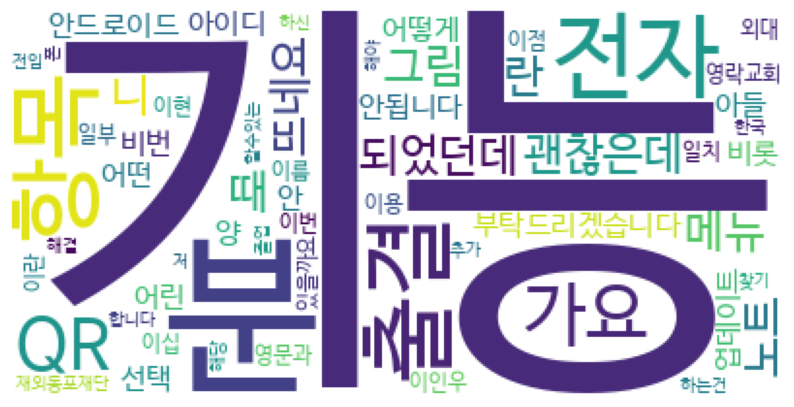

In [177]:
font='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

word_cloud = WordCloud(font_path = font,background_color='white',max_font_size=400).generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(word_cloud) # 결과 보여주기

부정 리뷰 워드클라우드

In [178]:
okt = Okt()

bad = okt.morphs(bad)
print(bad)

['전자', '출결', '애플', '거', '는', '바로', '되는데', '안드로이드', '는', '잘', '안되는', '것', '같습니다', '...', '빨리', '고쳐주시면', '좋겠습니다', '전자', '도서관', '예약', '시', '화면', '가장자리', '에', '위치', '한', '시간대', '들', '을', '예약', '하려고', '누르면', '화면', '이', '그냥', '다음', '시간', '대로', '넘어가', '버려서', '선택', '이', '불가능합니다', '.', '개선', '부탁드립니다', '...', '앱', '을', '만드시려면', '똑바로', '만드시면', '좋겠어요', '..', '외대', '는', '학교', '홈페이지', '부터', '어플', '까지', '한번', '에', '로그인', '이', '되는', '꼴', '을', '못', '보네요', 'ㅎㅎ', '이럴거면', '돈', '아깝게', '원스톱', '이랑', '디지털', '서비스', '팀', '직원', '은', '왜', '쓰는', '건지', '..', 'n', '년', '차라', '회의', '감', '을', '넘어서서', '환멸', '나', '요', '맨날', '접속', '이', '안되고', '특히', '학식', ',', '교', '식', '이나', '성적', '확인', '해야', '될', '때', '접속', '안되면', '짜증납니다', '지금', '앱', '실행', '이', '안됨', '몇', '일', '동안', '재', '설치', '해도', '동일함', '글캠', '컴공', '1', '학년', '하나', '잡아와', '서', '만들라', '해도', '이', '거', '보단', '잘', '만들듯', '쓰레기', '.', '불량품', '그', '자체', '.', '빠른', '개선', '바람', '.', '플립', '4', '인데', '전자', '출결', '디지게', '안됩니다', '.', '이', '거', '왜', '이래', '?', '큐알', '코드', '찍어야', 

In [179]:
bad_df = pd.DataFrame(bad, columns=['words'])
bad_df = pd.DataFrame(bad_df.groupby('words')['words'].count())
bad_df.rename(columns={'words':'cnt'}, inplace=True)
bad_df.reset_index(inplace=True)
bad_df.sort_values(by='cnt', ascending=False)[:10]

,words,cnt
117,이,9
36,는,5
1,.,5
116,을,4
105,어플,3
107,에,3
131,접속,3
17,거,3
130,전자,3
123,일,2


In [193]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','따른','및','는데','가','등','들','등','.	','ㄴ','었','습니다','어','"','가','를','고','ㅂ니다','의',',	','되','들','명','일','해','.',',','·','∼','했습니다','입니다','으로','(',')',':)','?','9','그','에서','..','...',';',';;','거','요']

In [194]:
bad_review = []
for word in bad_df['words']:
    if word not in stopwords:
        bad_review.append(word)

In [195]:
bad_review

['1',
 '4',
 'n',
 'ㅎㅎ',
 '가장자리',
 '감',
 '같습니다',
 '같은',
 '같은데',
 '개선',
 '건지',
 '것',
 '고쳐주시면',
 '관리',
 '교',
 '그냥',
 '글캠',
 '까지',
 '꼴',
 '나',
 '냐',
 '넘어가',
 '넘어서서',
 '년',
 '놈',
 '누르면',
 '다음',
 '대로',
 '도서관',
 '돈',
 '동안',
 '동일함',
 '되나요',
 '되는',
 '되는데',
 '될',
 '들어서야',
 '디지게',
 '디지털',
 '때',
 '똑바로',
 '라',
 '랑',
 '로그인',
 '만드시려면',
 '만드시면',
 '만들듯',
 '만들라',
 '맨날',
 '몇',
 '못',
 '뭐',
 '뭔가',
 '바람',
 '바로',
 '버러지',
 '버려서',
 '버퍼링',
 '보네요',
 '보단',
 '부탁드립니다',
 '부터',
 '불가능합니다',
 '불량품',
 '비밀번호',
 '비번',
 '빠른',
 '빨리',
 '서',
 '서버',
 '서비스',
 '선택',
 '설치',
 '성적',
 '시',
 '시간',
 '시간대',
 '식',
 '실행',
 '쓰는',
 '쓰레기',
 '아깝게',
 '아이디',
 '안되고',
 '안되는',
 '안되면',
 '안되요',
 '안됨',
 '안됩니다',
 '안드로이드',
 '않는',
 '애플',
 '앱',
 '어플',
 '업뎃',
 '예약',
 '오늘',
 '왜',
 '외대',
 '원스톱',
 '위치',
 '이나',
 '이랑',
 '이래',
 '이럴거면',
 '인데',
 '입력',
 '자체',
 '작동',
 '잘',
 '잡아와',
 '재',
 '전자',
 '접속',
 '좀',
 '좋겠습니다',
 '좋겠어요',
 '지금',
 '직원',
 '짜증납니다',
 '찍어야',
 '차라',
 '출결',
 '카테고리',
 '컴공',
 '켜지지',
 '코드',
 '큐알',
 '특히',
 '팀',
 '플립',
 '하고',
 '하나',
 '하려고',
 '하죠',
 '학교',
 

In [196]:
bad_df = bad_df[bad_df['words'].isin(bad_review)]
bad_df

,words,cnt
4,1,1
5,4,1
9,n,1
10,ㅎㅎ,1
11,가장자리,1
...,...,...
163,화면,2
164,확인,1
165,환멸,1
166,회의,1


In [197]:
bad_df.sort_values(by='cnt', ascending=False)[:10]

,words,cnt
105,어플,3
130,전자,3
131,접속,3
22,관리,2
132,좀,2
120,이래,2
63,뭐,2
45,되는데,2
140,출결,2
39,도서관,2


In [198]:
dic_word = bad_df.set_index('words').to_dict()['cnt']

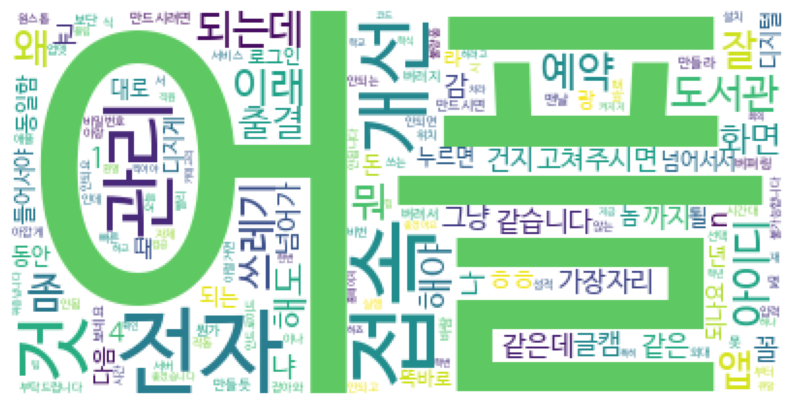

In [199]:
font='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

word_cloud = WordCloud(font_path = font,background_color='white',max_font_size=400).generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(word_cloud) # 결과 보여주기